<a href="https://colab.research.google.com/github/yarkalm/machinelearning/blob/main/IMDB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Калмыков Я.А.**
# **Лабораторная работа по методам искусственного интеллекта (IMDB)**
# **Задание 4**


#- Подключение библиотек и загрузка датасета

In [ ]:
from tensorflow import keras
import pandas as pd
from keras import models
import matplotlib.pyplot as plt
from keras.datasets import imdb
import numpy as np
from keras import regularizers
import tensorflow as tf

In [ ]:
keras.datasets.imdb.load_data(path="imdb.npz")
num_words = 10000
(data_train, target_train), (data_test, target_test) = keras.datasets.imdb.load_data(num_words = num_words)
x = np.concatenate((data_train,data_test), axis = 0)
y = np.concatenate((target_train, target_test), axis = 0)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
longest = num_words

# Закодирование отзывов

In [ ]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3,'#') for i in x[1]] )
print(decoded)
print(sorted(set(x[0])))
print(*x[0])

1641221/1641221 [==============================] - 0s 0us/step
# big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal # the hair is big lots of boobs # men wear those cut # shirts that show off their # sickening that men actually wore them and the music is just # trash that plays over and over again in almost every scene there is trashy music boobs and # taking away bodies and the gym still doesn't close for # all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back 

In [ ]:
pd.DataFrame.from_dict(sorted(reverse_index.items(), key=lambda x: x[0]))

,0,1
0,1,the
1,2,and
2,3,a
3,4,of
4,5,to
...,...,...
88579,88580,pipe's
88580,88581,copywrite
88581,88582,artbox
88582,88583,voorhees'


In [ ]:
pd.DataFrame.from_dict(sorted(index.items(), key=lambda x: x[1]))

,0,1
0,the,1
1,and,2
2,a,3
3,of,4
4,to,5
...,...,...
88579,pipe's,88580
88580,copywrite,88581
88581,artbox,88582
88582,voorhees',88583


# Векторизация отзывов

In [ ]:
def vectorize(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results



x = vectorize(x)
y = np.array(y).astype("float32")

x_test = x[:10000]
y_test = y[:10000]
x_train = x[10000:]
y_train = y[10000:]
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
print(*x_test[0][0:100])

0.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0


In [ ]:
print(len(x_test[0]))

10000


# Создание модели с малой ёмкостью

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation = "relu", input_shape=(longest, )))
# Hidden - Layers
model.add(keras.layers.Dropout(0.3, noise_shape=None, seed=None))
# Output- Layer
model.add(keras.layers.Dense(1, activation = "sigmoid"))

model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [ ]:
history = model.fit(
 x_train, y_train,
 epochs= 2,
 batch_size = 500,
 validation_data = (x_test, y_test)
)

Epoch 1/2
80/80 [==============================] - 5s 49ms/step - loss: 0.6239 - accuracy: 0.6650 - val_loss: 0.5288 - val_accuracy: 0.8199
Epoch 2/2
80/80 [==============================] - 2s 29ms/step - loss: 0.5128 - accuracy: 0.8194 - val_loss: 0.4747 - val_accuracy: 0.8759


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 20002     
                                                                 
 dropout (Dropout)           (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 20,005
Trainable params: 20,005
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print("Accuracy: ",np.mean(history.history["val_accuracy"]))

Accuracy:  0.8478999733924866


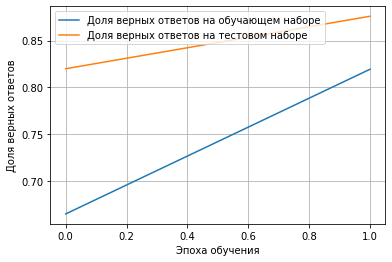

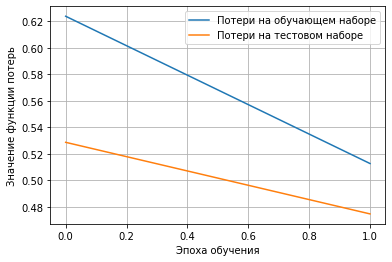

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на тестовом наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.grid()
plt.legend()
plt.show()



plt.plot(history.history['loss'], 
         label='Потери на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Потери на тестовом наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции потерь')
plt.grid()
plt.legend()
plt.show()

# Создание модели с большей ёмкостью

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(50, activation = "relu", input_shape=(longest, )))
# Hidden - Layers
model.add(keras.layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(keras.layers.Dense(50, activation = "relu"))
model.add(keras.layers.Dense(40, activation = "relu"))
model.add(keras.layers.Dense(30, activation = "relu"))
model.add(keras.layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(keras.layers.Dense(20, activation = "relu"))
# Output- Layer
model.add(keras.layers.Dense(1, activation = "sigmoid"))

model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [ ]:
history = model.fit(
 x_train, y_train,
 epochs= 2,
 batch_size = 500,
 validation_data = (x_test, y_test)
)

Epoch 1/2
80/80 [==============================] - 5s 50ms/step - loss: 0.4667 - accuracy: 0.7824 - val_loss: 0.2804 - val_accuracy: 0.8915
Epoch 2/2
80/80 [==============================] - 4s 45ms/step - loss: 0.2300 - accuracy: 0.9136 - val_loss: 0.2628 - val_accuracy: 0.8953


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                500050    
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 40)                2040      
                                                                 
 dense_5 (Dense)             (None, 30)                1230      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_6 (Dense)             (None, 20)               

In [ ]:
print("Accuracy: ",np.mean(history.history["val_accuracy"]))

Accuracy:  0.8933999836444855


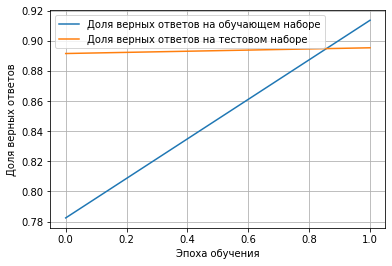

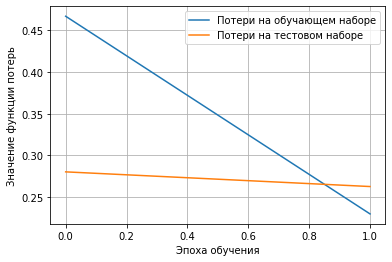

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на тестовом наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.grid()
plt.legend()
plt.show()



plt.plot(history.history['loss'], 
         label='Потери на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Потери на тестовом наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции потерь')
plt.grid()
plt.legend()
plt.show()

# Создание модели с регуляризацией

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation = "relu", input_shape=(longest, )))
# Hidden - Layers
model.add(keras.layers.Dense(2, activation = "relu",kernel_regularizer=regularizers.L1L2(l1=0.1,l2=0.1)))
model.add(keras.layers.Dense(2, activation = "relu"))
# Output- Layer
model.add(keras.layers.Dense(1, activation = "sigmoid"))

model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [ ]:
history = model.fit(
 x_train, y_train,
 epochs= 2,
 batch_size = 500,
 validation_data = (x_test, y_test)
)

Epoch 1/2
80/80 [==============================] - 3s 30ms/step - loss: 0.9389 - accuracy: 0.4939 - val_loss: 0.9112 - val_accuracy: 0.4947
Epoch 2/2
80/80 [==============================] - 2s 25ms/step - loss: 0.8896 - accuracy: 0.5013 - val_loss: 0.8684 - val_accuracy: 0.4947


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 20002     
                                                                 
 dense_9 (Dense)             (None, 2)                 6         
                                                                 
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 20,017
Trainable params: 20,017
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print("Accuracy: ",np.mean(history.history["val_accuracy"]))

Accuracy:  0.49470001459121704


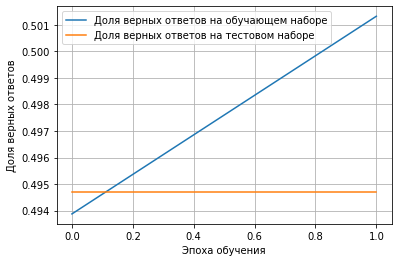

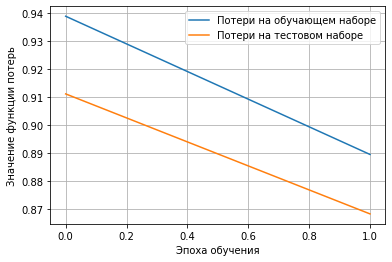

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на тестовом наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.grid()
plt.legend()
plt.show()



plt.plot(history.history['loss'], 
         label='Потери на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Потери на тестовом наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции потерь')
plt.grid()
plt.legend()
plt.show()

# Создание и обучение модели с Dropout

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(50, activation = "relu", input_shape=(longest, )))
# Hidden - Layers
model.add(keras.layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(keras.layers.Dense(50, activation = "relu"))
model.add(keras.layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(keras.layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(keras.layers.Dense(1, activation = "sigmoid"))

model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [ ]:
history = model.fit(
 x_train, y_train,
 epochs= 2,
 batch_size = 500,
 validation_data = (x_test, y_test)
)

Epoch 1/2
80/80 [==============================] - 5s 54ms/step - loss: 0.4053 - accuracy: 0.8188 - val_loss: 0.2594 - val_accuracy: 0.8981
Epoch 2/2
80/80 [==============================] - 4s 46ms/step - loss: 0.2142 - accuracy: 0.9190 - val_loss: 0.2678 - val_accuracy: 0.8932


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                500050    
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_14 (Dense)            (None, 50)                2550      
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 505,201
Trainable params: 505,201
Non-tr

In [ ]:
print("Accuracy: ",np.mean(history.history["val_accuracy"]))

Accuracy:  0.8956499993801117


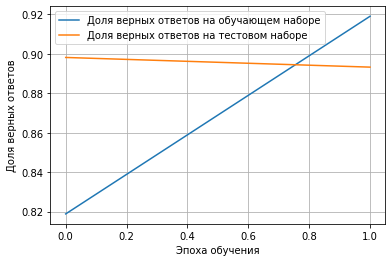

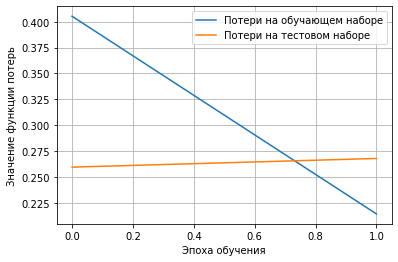

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на тестовом наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.grid()
plt.legend()
plt.show()



plt.plot(history.history['loss'], 
         label='Потери на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Потери на тестовом наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции потерь')
plt.grid()
plt.legend()
plt.show()

# Графики

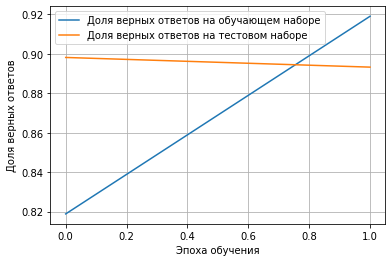

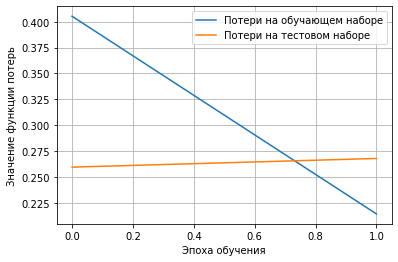

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на тестовом наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.grid()
plt.legend()
plt.show()



plt.plot(history.history['loss'], 
         label='Потери на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Потери на тестовом наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции потерь')
plt.grid()
plt.legend()
plt.show()

# Эксперимент

In [ ]:
rate = input()
#rate = "this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what"
coded = []

for word in rate.split(' '):
  if word in index:
    coded.append(int(index[word]))

coded =[coded]
#for code in coded:
 # print(reverse_index[code], end = ' ')

print(coded)

In [ ]:
pred_review = model.predict(vectorize(coded))

if pred_review > 0.5:
  print('Positive review')
elif pred_review < 0.5:
  print('Negative review')
else:
  print('50/50')